# Exemplu de clasificator bazat pe HOG si SVM

## Ce este SVM

SVM (Support Vector Machines) este un algoritm de învățare automată supravegheată. Scopul principal al unui SVM este de a găsi un plan (sau o hiperplan) care separă în mod optim clasele de date într-un spațiu multidimensional. Acest plan este ales astfel încât să maximizeze marginea, adică distanța dintre cele mai apropiate puncte de date din fiecare clasă, numite vectori de susținere.

SVM este un algoritm de clasificare binara - el este capabil sa discrimineze intre doua categorii. Se poate extinde la mai multe categorii antrenand mai multe modele (de exemplu pentru fiecare categorie se antreneaza un model care discrimineaza intre categoria data si toate celelalte categorii).

Fiecare element este reprezentat printr-un vector - in realitate un set de numere, a carui dimensiune este dependenta de tehnica de extragere a caracteristicilor. Toate elementele cor fi reprezentate de aceeasi lista de categorii, avand aceeasi dimensiune.

Astfel, fiecare element poate fi tratat ca fiind un punct intr-un spatiu n-dimensional unde n este numarul de elemente din fiecare lista.

Orice punct intr-un spatiu ndimensional poate fi privit si ca fiind un vector care porneste din origine si se termima in acel punct.

Trebuie retinut ca spatiile n-dimensionale, chiar daca nu au un corespondent natural intuitiv, au proprietatea ca geometria functioneaza. Distanta dintre doua puncte in 2D se calculeaza la fel ca distanta dintre doua puncte in 15d, unghiul dintre doi vectori se calculeaza la fel... etc.

Unghiul dintre doi astfel de vectori intr-un spatiu n-dimensional este o masura a apropierii dintre cele doua puncte.

### Exemplu 2D SVM liniar

Putem ilustra SVM in 2d pentru a putea obtine grafice care sa fie usor de urmarit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

Presupunand ca avem un set de date, in acest caz de puncte in 2 dimensiuni, descrise in lista X, impartite in doua categorii conform pozitiei corespunzatoare din lista y (primele trei puncte corespund valorii 1 deci fac parte din categoria 1, urmatoarele 3 din categoria 0... etc).

In [2]:
X = np.array([
    [1, 7],
    [2, 8],
    [3, 8],
    [5, 1],
    [6, -1],
    [7, 3],
    [4, 6],
    [3, 3],
    [8, 5],
    [7, 2],
])

# Etichete (0 sau 1) - două clase
y = np.array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0])


La baza oricarui astfel de algoritm de clasificare sta de fiecare data o formula care permite determinarea similaritatii dintre doua puncte, numita aici "nucleu" (kernel). Cea mai simpla astfel de formula este produsul scalar dintre cei doi vectori. Acesta este utilizat in tipul de nucleu "liniar".

Metoda "fit" va cauta (in 2d) linia care separa cel mai bine cele doua grupe de puncte, identificat linia care se afla la cea mai mare distanta posibila de cele mai apropiate puncte din fiecare categorie.

Aceste "cele mai apropiate puncte", in reprezentare vectoriala se numesc "vectori suport" - de unde si denumirea metodei.

In [3]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

Putem vizualiza rezultatul

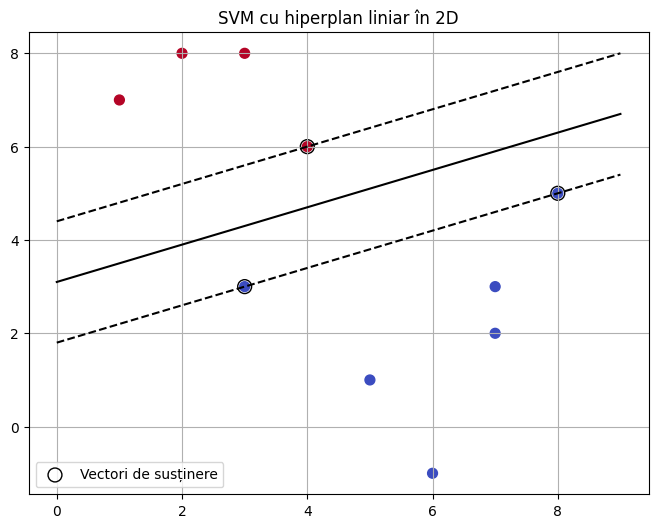

In [4]:
plt.figure(figsize=(8, 6))

# Desenare puncte și culori
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50)

# Obține coeficienții planului
w = clf.coef_[0]
b = clf.intercept_[0]

# Desenare hiperplan
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max)
yy = -(w[0] * xx + b) / w[1]  # Hiperplan: w1*x + w2*y + b = 0

plt.plot(xx, yy, 'k-')

# Marginile
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + (w[0] / w[1])**2) * margin
yy_up = yy + np.sqrt(1 + (w[0] / w[1])**2) * margin
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Vectorii de susținere
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Vectori de susținere')

plt.title("SVM cu hiperplan liniar în 2D")
plt.legend()
plt.grid(True)
plt.show()


### Exemplu SVM cu nucleu neliniar

Sunt situatii (majoritatea) in care limita de demarcatie dintre cele doua grupe de puncte nu poate fi o dreapta. Prin utilizarea unor metode neliniare de calcul al apropierii punctelor, se poate obtine o delimitare care nu mai este liniara. Aceste metode se pot apela folosind un nucleu neliniar, de exemplu rbf.

In [5]:
Xn = np.array([
    [1, 2], [2, 3], [3, 2], [2, 1],
    [6, 5], [7, 7], [8, 6], [7, 5],
    [5, 6], [4, 7], [6, 7], [5, 5]
])

yn = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# SVM cu kernel radial (RBF)
clfn = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
clfn.fit(Xn, yn)


SVC()

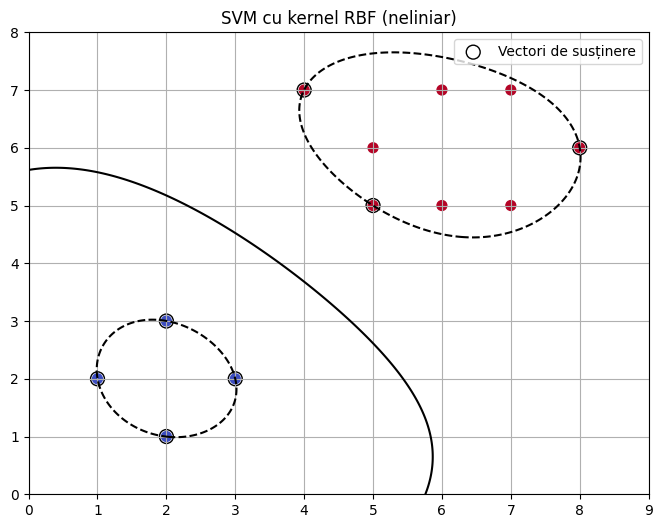

In [6]:
plt.figure(figsize=(8, 6))

# Afișează punctele
plt.scatter(Xn[:, 0], Xn[:, 1], c=yn, cmap=plt.cm.coolwarm, s=50)

# Creare grid 2D pentru evaluarea funcției de decizie
x_min, x_max = Xn[:, 0].min() - 1, Xn[:, 0].max() + 1
y_min, y_max = Xn[:, 1].min() - 1, Xn[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))

# Evaluare decizie pe grid
Z = clfn.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# Contururi: linia de decizie (0), marginile (-1, +1)
plt.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

# Vectorii de susținere
plt.scatter(clfn.support_vectors_[:, 0], clfn.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Vectori de susținere')

plt.title("SVM cu kernel RBF (neliniar)")
plt.legend()
plt.grid(True)
plt.show()


Dupa antrenament, SVM-ul are la dispozitie aceasta limita de separare intre cele doua domenii. Un element nou (o noua imagine) reprezentata prin acelasi set de caracteristici, se va poziționa intr-unul dintre aceste domenii, separate de limita. În funcție de domeniul în care se poziționeaza, se identifică categoria din care face parte.

## Construcția unui clasificator pentru fete pe baza HOG

Putem utiliza vectorul de gradienți extras de HOG pentru a încerca construcția unui clasificator bazat pe SVM. Pentru aceasta avem nevoie de următoarele:

- o cantitate mare de imagini care să reprezinte cele două categorii (imagini cu fețe și imagini fără fețe)
- o dimensiune fixă a acestor imagini
- decizia cu privire la parametrii HOG (numărul de intervale în histogramă, etc)



### Preluarea datelor (imaginilor) de antrenament din google drive

Putem prelua imaginile dintr-un director al google drive daca executam codul in google collaboratory. Datele se gasesc in acelasi director, denumirile fisierelor care contin fețe încep cu prefixul "face_"

In [7]:
import google.colab
google.colab.drive.mount('/content/gdrive/', force_remount=True)
import sys
import os

Mounted at /content/gdrive/


In [8]:
data_dir = '/content/gdrive/MyDrive/Facultate Informatica/Profesor/2024 - 2025/Sisteme expert si metode biometrice in securitatea informatiei/Curs/ColabMount/DATA/train_classifier'
test_dir = '/content/gdrive/MyDrive/Facultate Informatica/Profesor/2024 - 2025/Sisteme expert si metode biometrice in securitatea informatiei/Curs/ColabMount/DATA/test_classifier'

Importam bibliotecile necesare

In [9]:
import numpy as np
import io
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

### Extragerea gradientilor HOG si a listei de categorii

Redimensionăm toate imaginile la 64 x 64 pixeli (probabil o dimensiune mai mare ar genera un clasificator mai precis dar antrenamentul ar dura mai mult).

In [10]:
image_size = (64, 64)
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

X = [] # gradientii
y = [] # categoriile

for filename in tqdm(os.listdir(data_dir), desc="Processing images"):
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    path = os.path.join(data_dir, filename)
    image = imread(path, as_gray=True)          #citirea imaginii
    image_resized = resize(image, image_size)   #redimensionarea imaginii

    features = hog(image_resized,
                   orientations=orientations,
                   pixels_per_cell=pixels_per_cell,
                   cells_per_block=cells_per_block,
                   block_norm='L2-Hys',
                   visualize=False)

    X.append(features)
    y.append(1 if filename.startswith("face_") else 0)


Processing images: 100%|██████████| 447/447 [00:26<00:00, 17.07it/s] 


### Antrenarea modelului

In [11]:
clf = LinearSVC()
clf.fit(X, y)

LinearSVC()

### Testarea modelului pe baza imaginilor de test

In [12]:
image_size = (64, 64)
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

y_true = []
y_pred = []
false_detections = []

for label_dir, label_value in [('positive', 1), ('negative', 0)]:
    dir_path = os.path.join(test_dir, label_dir)
    for filename in tqdm(os.listdir(dir_path), desc=f"Processing {label_dir}"):
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        path = os.path.join(dir_path, filename)
        image = imread(path, as_gray=True)
        image_resized = resize(image, image_size)

        features = hog(image_resized,
                       orientations=orientations,
                       pixels_per_cell=pixels_per_cell,
                       cells_per_block=cells_per_block,
                       block_norm='L2-Hys',
                       visualize=False)

        pred = clf.predict([features])[0]
        y_pred.append(pred)
        y_true.append(label_value)

        if pred != label_value:
            false_detections.append((image, filename, label_value, pred))



Processing negative: 100%|██████████| 20/20 [00:10<00:00,  1.83it/s]


### Afisarea rezultatelor



#### Procesul de detectie

Afisarea rezultatelor urmareste cateva elemente. In primul rand calitatea detectie, exprimata sub forma a 4 parametrii:

- Pozitive corecte - detectii pozitive corecte (fete in imagine)
- Negative corecte - detectii negative corecte (lipsa fetelor in imagini)
- Falsuri pozitive - modelul a detectat o fata acolo unde nu exista
- falsuri negative - modelul a detectat o imagine care NU este fata, acolo unde aceasta in realitate exista

In [13]:
# Print confusion matrix and classification report
print("\nMatricea de confuzie:")
print(" TP (pozitive corecte) | FN (pozitive gresite) ")
print(" FP (negative gresite) | TN (negative corecte) ")

print(confusion_matrix(y_true, y_pred))




Matricea de confuzie:
 TP (pozitive corecte) | FN (pozitive gresite) 
 FP (negative gresite) | TN (negative corecte) 
[[18  2]
 [ 0 20]]


#### Imaginile gresit clasificate

Urmarind imaginile observam ca una dintre imaginile detectate ca fiind negative este in realitate corecta - este o imagine cu un clown care este corect detectata ca o fata.

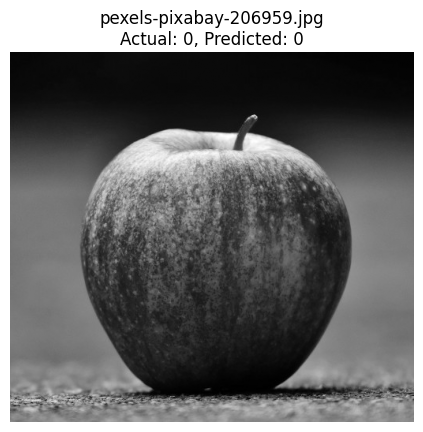

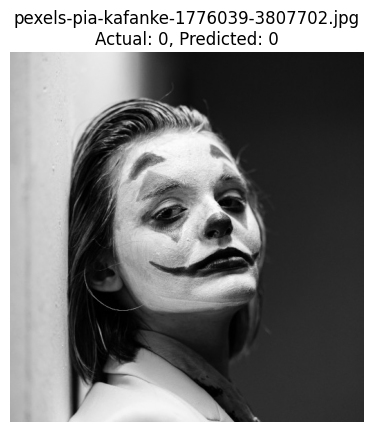

In [14]:
for i, (img, fname, actual, predicted) in enumerate(false_detections):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f"{fname}\nActual: {actual}, Predicted: {pred}")
    plt.axis('off')
    plt.show()

### Testarea modelului cu ajutorul unei imagini

In [ ]:
from google.colab import files
from IPython.display import display
uploaded = files.upload()  # Allows user to upload a file
# Get the first uploaded file
image_path = list(uploaded.keys())[0]



Saving face_5_m.jpg to face_5_m.jpg


AttributeError: module 'io' has no attribute 'imread'

In [ ]:
image = imread(path, as_gray=True)
image_resized = resize(image, image_size)

features = hog(image_resized,
                orientations=orientations,
                pixels_per_cell=pixels_per_cell,
                cells_per_block=cells_per_block,
                block_norm='L2-Hys',
                visualize=False)

pred = clf.predict([features])[0]
label = 'Face' if pred == 1 else 'Non-Face'
print(f"{os.path.basename(path)} → Prediction: {label}")

face_84_f.jpg → Prediction: Face


In [16]:
from sklearn.manifold import TSNE

In [17]:
X_np = np.array(X)
y_np = np.array(y)

In [18]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)

X_2d = tsne.fit_transform(X_np)



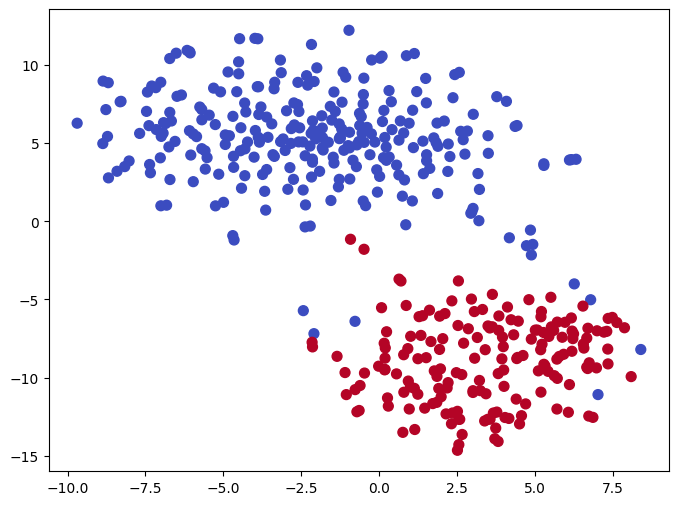

In [19]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_np, cmap=plt.cm.coolwarm, s=50)

plt.show()